In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 전처리

In [5]:
# X값 정규화
X_train = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')/255
X_test = test_images.reshape(test_images.shape[0],28,28,1).astype('float')/255

In [6]:
# Y데이터 One-Hot Encoding
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

### 모델 구성

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
import os
# 모델 최적화 설정
MODEL_DIR = './model/fashion'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
# 모델의 실행
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30,
                   batch_size=200, 
                   callbacks=[early_stopping_callback, checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.8012
Epoch 00001: val_loss improved from inf to 0.35499, saving model to ./model/fashionmnist-cnn-01-0.3550.hdf5
48000/48000 [==============================] - 21s 434us/sample - loss: 0.5471 - accuracy: 0.8016 - val_loss: 0.3550 - val_accuracy: 0.8743
Epoch 2/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.3548 - accuracy: 0.8718
Epoch 00002: val_loss improved from 0.35499 to 0.30746, saving model to ./model/fashionmnist-cnn-02-0.3075.hdf5
48000/48000 [==============================] - 20s 424us/sample - loss: 0.3546 - accuracy: 0.8718 - val_loss: 0.3075 - val_accuracy: 0.8903
Epoch 3/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.8909
Epoch 00003: val_loss improved from 0.30746 to 0.27373, saving model to ./model/fashionmnist-cnn-03-0.2737.hdf5
48000/48000 [=========================

In [16]:
from tensorflow.keras.models import load_model
del model
model =load_model('./model/fashionmnist-cnn-13-0.2091.hdf5')

In [17]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9228


In [18]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

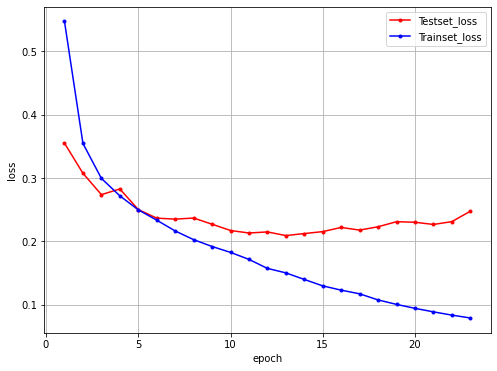

In [19]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()